In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from tsmoothie.smoother import *
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('../results.csv')
categories = ['Neutral','Happy','Sad','Surprise']

### Pie Chart

In [6]:
df.head()

,frame,class


In [5]:
size = [df['class'].value_counts()[0], df['class'].value_counts()[1], df['class'].value_counts()[2], df['class'].value_counts()[3]]

plt.figure(figsize=(15,13))
plt.title('Percentage of emotions')
plt.pie(size, labels=categories, autopct='%1.1f%%')
plt.savefig('online_mode/graphs/pie.jpg')

IndexError: index out of bounds

### Bar Plot

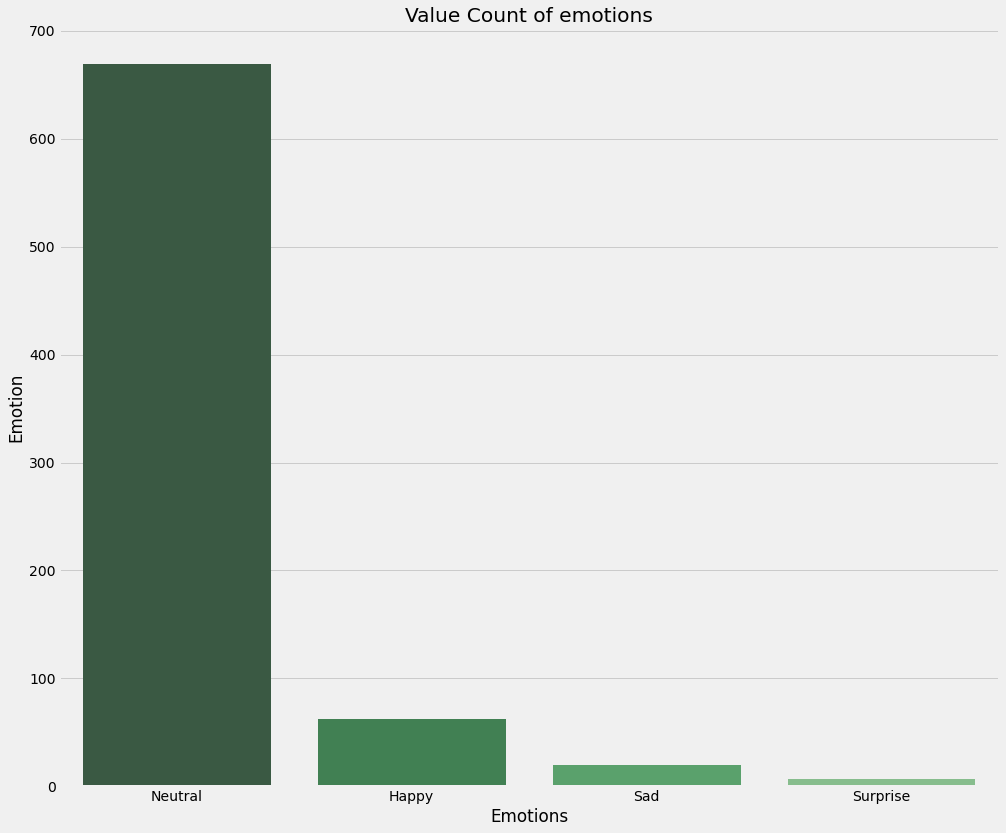

In [5]:
    plt.figure(figsize=(15,13))
    sns.barplot(['Neutral', 'Happy', 'Sad', 'Surprise'], df['class'].value_counts(), palette='Greens_d')
    plt.xlabel('Emotions')
    plt.ylabel('Emotion')
    plt.title('Value Count of emotions')
    plt.savefig('graphs/bar.jpg')

In [23]:
#Creating a new column
df['ranking'] = np.zeros((df.shape[0],1))

for i in range(df.shape[0]):
    category = df['class'][i]
    
    if category == 'Happy':
        df['ranking'][i] = 0.9
    elif category == 'Surprise':
        df['ranking'][i] = 0.7
    elif category == 'Neutral':
        df['ranking'][i] = 0.5
    else:
        df['ranking'][i] = 0.3

### Bar & plot

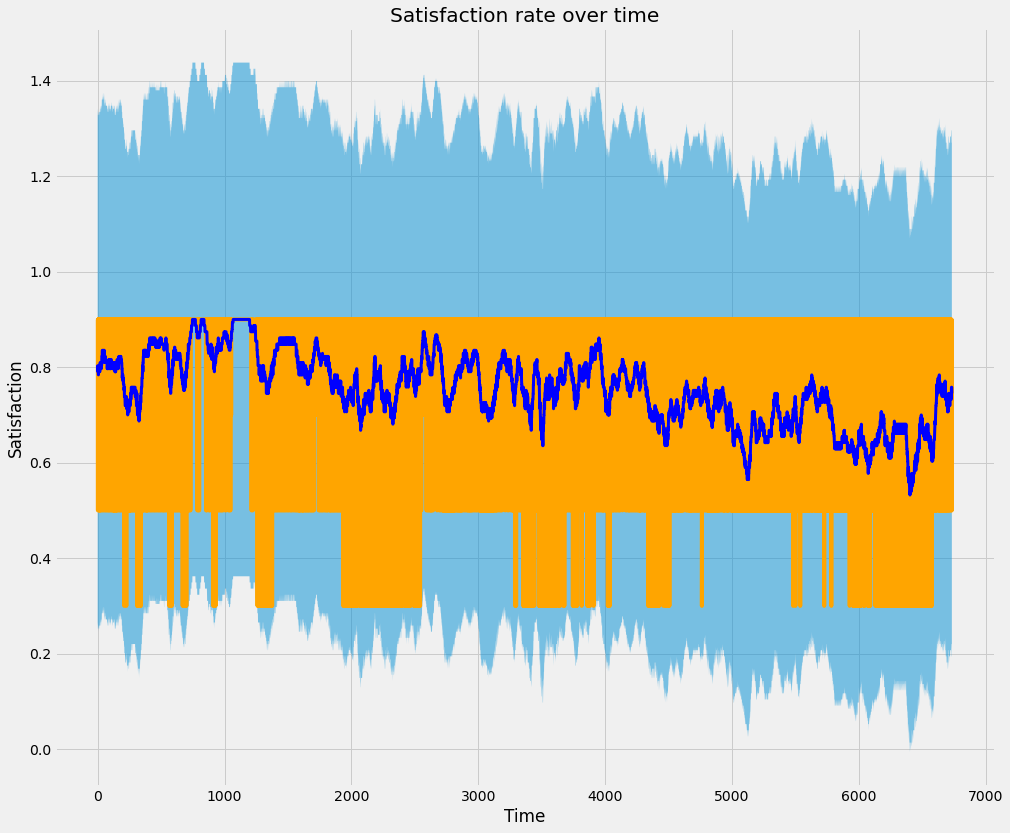

In [24]:
smoother = ConvolutionSmoother(window_len=30, window_type='ones')
smoother.smooth(df['ranking'])

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=3)

# plot the smoothed timeseries with intervals
plt.figure(figsize=(15,13))
plt.plot(smoother.data[0], color='orange')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Satisfaction')
plt.title('Satisfaction rate over time')
plt.savefig('online_mode/graphs/dist.jpg')

In [25]:
df['posneg'] = np.zeros((df.shape[0],1))

for i in range(df.shape[0]):
    if df['class'][i] =='Happy' or df['class'][i] == 'Surprise' or df['class'][i] == 'Neutral':
        df['posneg'][i] = 1
    else:
        df['posneg'][i] = 0


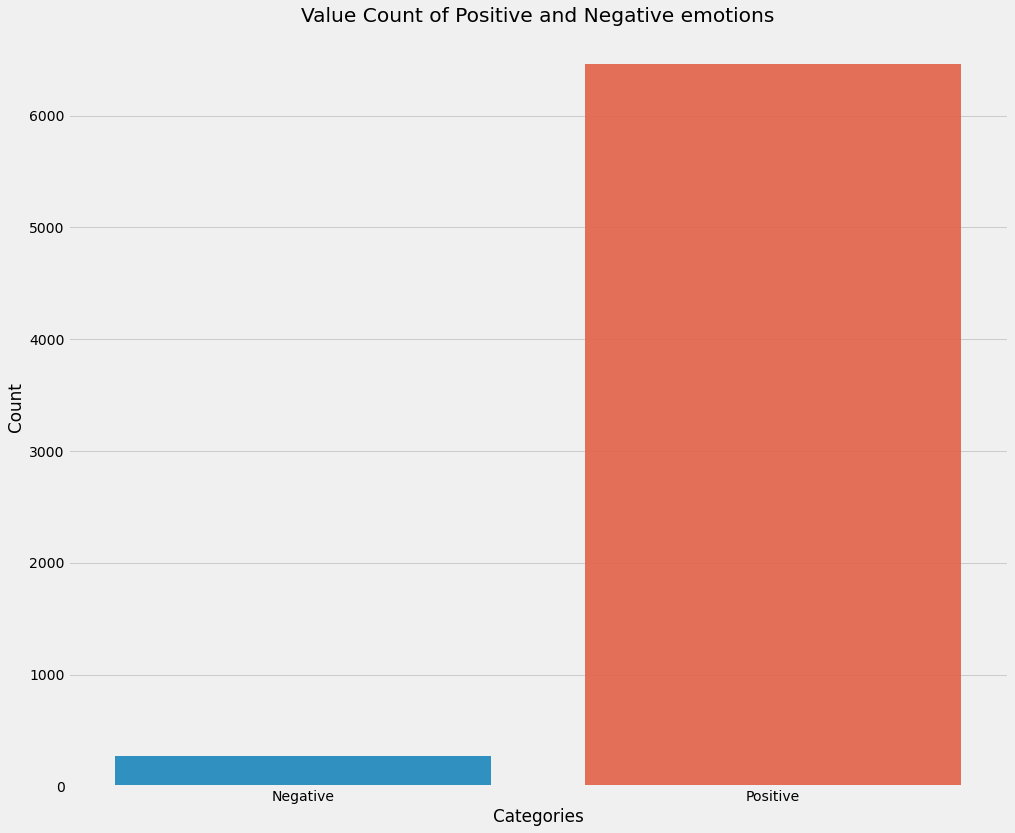

In [26]:
y = [df['posneg'].value_counts()[0], df['posneg'].value_counts()[1]]

plt.figure(figsize=(15,13))
sns.barplot(['Negative','Positive'],y, alpha=0.9)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Count of Positive and Negative emotions')
plt.savefig('online_mode/graphs/posneg.jpg')